In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30)

import seaborn as sns
sns.set(style='whitegrid' , color_codes=True)

from statsmodels.tsa.stattools import acf,pacf

In [2]:
axisline = np.linspace(0,10,500)

# normal distributed values
normal_numbers = np.random.normal(0,5,500)

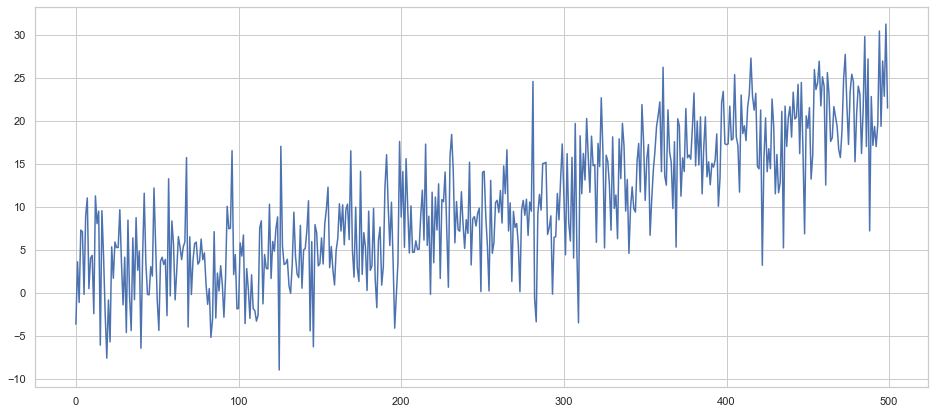

In [4]:
# exponential series to get trend
exponential_Series = np.exp(axisline**0.5)

# adding normaly distributed series in a exponential series
y= normal_numbers+exponential_Series

#plot
plt.figure(figsize=(16,7))
plt.plot(y)

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


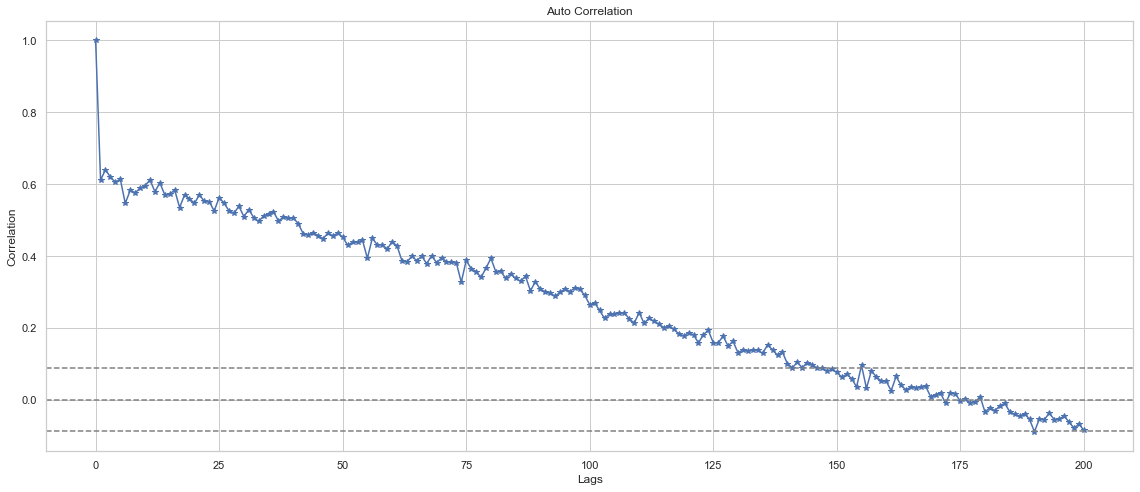

In [11]:
# calling auto correlation function
ACF_lag = acf(y, nlags=200)

#plt ACF
plt.figure(figsize=(16,7))
plt.plot(ACF_lag,marker="*")

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()

### Note:
1. here we can see upto 125 lags there is some correlation ,and some realtion is there.
2. it means the time series is relatedto previous 125 observation or time series can be regresed on 125 observations.
3. but if we consider previous 125 observation then it will be a multi coolinearity problem because if at time t the time series can be explained by t-1 then t-1 can be expressed by t-2. so we do not want to consider the large no of lags we need to limt the lags.
4. to avoid multicoolinearity use use the PACP

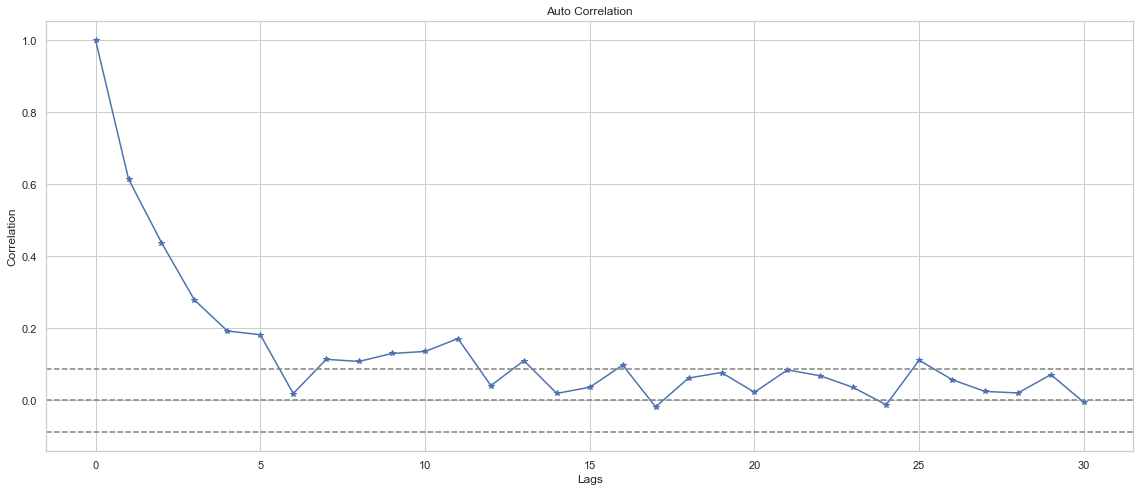

In [14]:
# calling auto correlation function
PACP_lag = pacf(y, nlags=30, method='ols')

#plt ACF
plt.figure(figsize=(16,7))
plt.plot(PACP_lag,marker="*")

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.tight_layout()

### Note:
1. here we can see after 5 or 6 lags there is some relationship .
2. hence we can say that the AutoRegression model should be of window 7 .
3. AR(window=7) 

### it is simply how many lags is suitable for your timeseries to create a auto regressor model